This notebook explores Monte Carlo methods using Python.

Date Created: 12 Oct 2018
<br>
Last Modified: 5 May 2021 
<br>
Humans Responsible: JC

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

# 0.0 A bit of History
https://en.wikipedia.org/wiki/Monaco

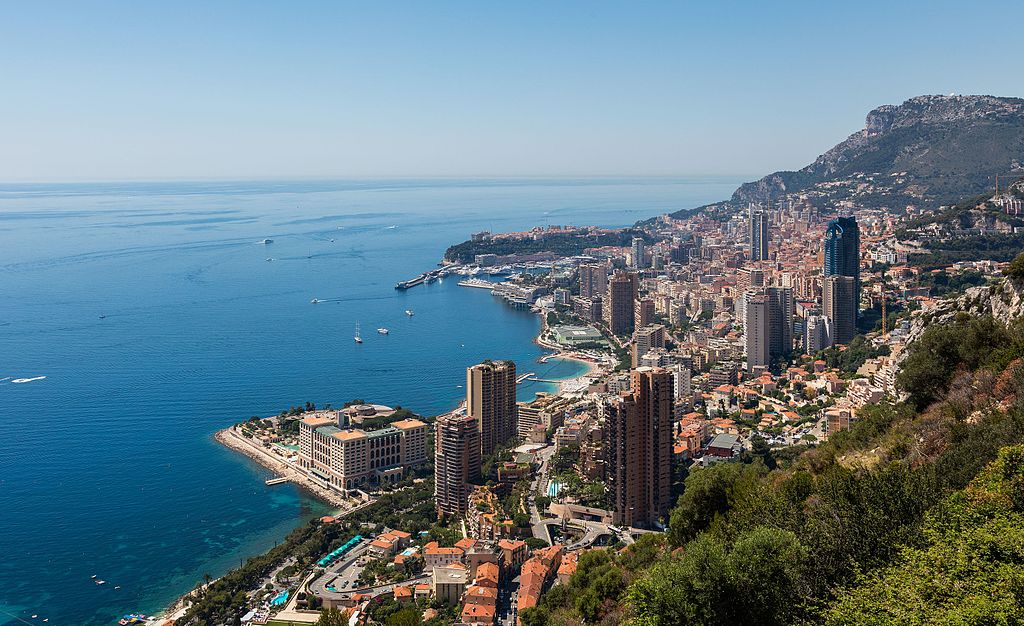

In [3]:
from IPython.display import Image
Image(filename='images/Monaco.jpg', width=800)

# 1.0 Random numbers
https://en.wikipedia.org/wiki/Linear_congruential_generator
<br>
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html


In [17]:
# Good set
N = 10000

a = 1664525
c = 1013904223
m = 2**32
x = 1 # seed 

In [12]:
# Bad set
N = 1000

a = 16
c = 3
m = 23
x = 1

In [18]:
results = np.zeros(N)

for n in range(N):
    x = (a*x + c) % m
    results[n] = x


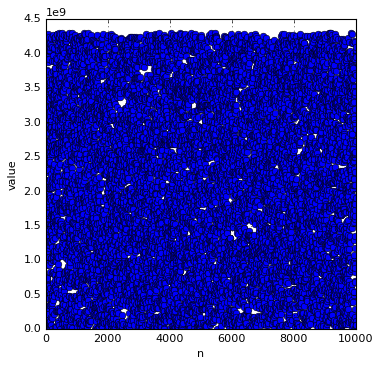

In [19]:
fig = plt.figure(figsize=(5,5))
plt.plot(results, 'bo', linewidth=2)
plt.xlabel('n')
plt.ylabel('value')
plt.grid()

plt.show()

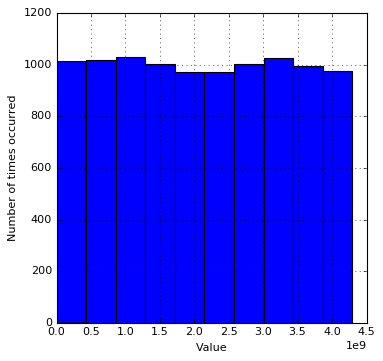

In [20]:
fig = plt.figure(figsize=(5,5))
plt.hist(results)
plt.xlabel('Value')
plt.ylabel('Number of times occurred')
plt.grid()

plt.show()

In [ ]:
# You can use the numpy seed function to make reproducible code.
np.random.seed( )

# 2.0 Monte Carlo Example - Estimating Pi

In [21]:
r = 1
x = np.linspace(-1,1,100)
y = np.sqrt(r**2 - x**2)

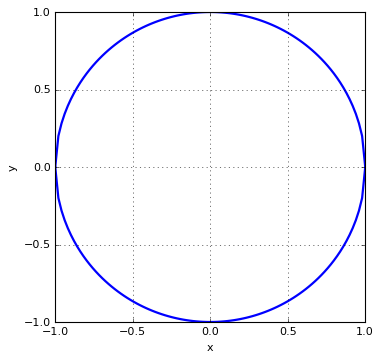

In [22]:
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

plt.show()

In [23]:
# Pick a random point on the interval [-1,1] for x and y
x_rand = np.random.uniform(-1,1)
y_rand = np.random.uniform(-1,1)

print(x_rand)
print(y_rand)

0.038126943029829
0.32624106201266434


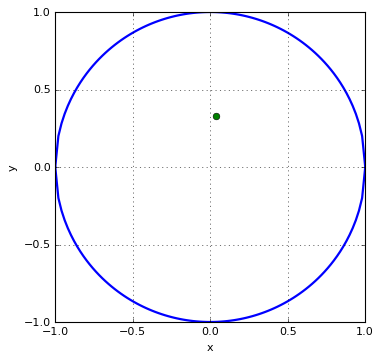

In [24]:
# If it's inside the circle, make it green, outside the circle, make it red.

if ((x_rand**2 + y_rand**2) < r**2):
    inside = True
else:
    inside = False


fig = plt.figure(figsize=(5,5))

if (inside == True):
    plt.plot(x_rand, y_rand, 'go')
else:
    plt.plot(x_rand, y_rand, 'ro')

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


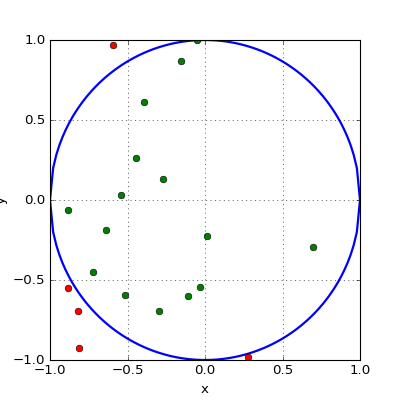

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [25]:
# Now do a loop
%matplotlib notebook


N = 20

# Initialise a figure
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()


N_inside = 0

for n in range(0,N):
    print(n)
    
    x_rand = np.random.uniform(-1,1)
    y_rand = np.random.uniform(-1,1)
    
    if ((x_rand**2 + y_rand**2) < r**2):
        inside = True
    else:
        inside = False
    

    if (inside == True):
        plt.plot(x_rand, y_rand, 'go')
        N_inside += 1
    else:
        plt.plot(x_rand, y_rand, 'ro')

    fig.canvas.draw()
    time.sleep(0.1)
    
%matplotlib inline

In [26]:
p = N_inside/N
print(p)

0.75


In [27]:
A = 2*2 # Area of the box 
p*A # estimate for the area of the circle - which is pi in this case.

3.0

## For loop implementation

In [28]:
N = 1000
N_inside = 0

for n in range(0,N):    
    x_rand = np.random.uniform(-1,1)
    y_rand = np.random.uniform(-1,1)
    
    if ((x_rand**2 + y_rand**2) < r**2):
        N_inside += 1
        
p = N_inside/N
print("P(inside)= %.2f" % p)
print(p*A)

P(inside)= 0.78
3.132


## Vector op implementation

In [29]:
N = 1000

x_rand = np.random.uniform(-1,1,N)
y_rand = np.random.uniform(-1,1,N)
r_vec = r * np.ones([1,N])

N_inside = np.sum((x_rand**2 + y_rand**2) < r_vec**2)

p = N_inside/N
print("P(inside)= %.2f" % p)
print(p*A)

P(inside)= 0.78
3.1


## How does the estimate behave as we change N

In [30]:
N_min = 10
N_max = 100
N_vec = np.arange(N_min,N_max,1)
N_len = len(N_vec)

num_repeat = 1000

est_vec = np.zeros(num_repeat)
est_mean = np.zeros(N_len)
est_std = np.zeros(N_len)

for i in range(N_len):
    N = N_vec[i]
    r_vec = r * np.ones([1,N])
    
    for j in range(num_repeat):
        x_rand = np.random.uniform(-1,1,N)
        y_rand = np.random.uniform(-1,1,N)
        
        N_inside = np.sum((x_rand**2 + y_rand**2) < r_vec**2)
        
        p = N_inside/N
        est_vec[j] = p*A
        
    est_mean[i] = np.mean(est_vec)
    est_std[i] = np.std(est_vec)

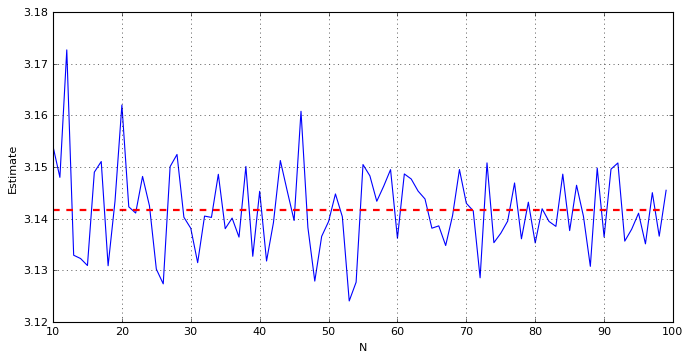

In [31]:
fig = plt.figure(figsize=(10,5))
plt.plot(N_vec, est_mean)
plt.plot(N_vec, np.pi*np.ones(N_len), 'r--', linewidth=2)

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()

plt.show()

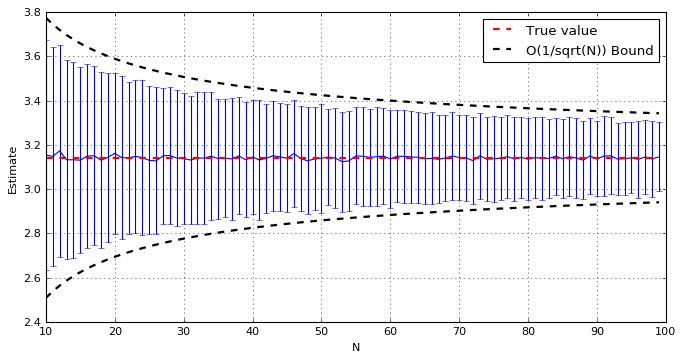

In [32]:
fig = plt.figure(figsize=(10,5))
plt.errorbar(N_vec, est_mean, yerr=est_std)
plt.plot(N_vec, np.pi*np.ones(N_len), 'r--', linewidth=2, label='True value')
plt.plot(N_vec,  2/np.sqrt(N_vec)+np.pi, 'k--', linewidth=2, label='O(1/sqrt(N)) Bound')
plt.plot(N_vec, -2/np.sqrt(N_vec)+np.pi, 'k--', linewidth=2)

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()
plt.legend(loc='best')

plt.show()

0.773
3.092


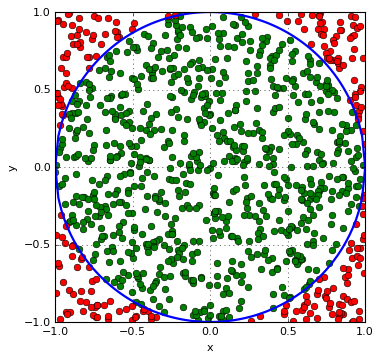

In [33]:
N = 1000
x_rand = np.random.uniform(-1,1,N)
y_rand = np.random.uniform(-1,1,N)
r_vec = r * np.ones([1,N])

binary_vec = (x_rand**2 + y_rand**2) < r_vec**2
N_inside = np.sum(binary_vec)

p = N_inside/N
print(p)
print(p*A)


fig = plt.figure(figsize=(5,5))

plt.plot(x_rand[binary_vec[0] == True], y_rand[binary_vec[0] == True], 'go')
plt.plot(x_rand[binary_vec[0] == False], y_rand[binary_vec[0] == False], 'ro')

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x, -y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()

plt.show()

# 3.0 The mean-value method
Given 
$$
I = \int_a^b f(x) \; dx,
$$

the value of the integral, $I$, can be estimated as

$$
I \approx (b-a) \frac{1}{N} \sum_{i=1}^{N} f(x_i).
$$

with an error given by the  standard deviation
$$
\sigma = (b-a) \frac{1}{\sqrt{N}} \sqrt{Var(f(x_i))}
$$


# 3.1 A simple function
Let's estimate the integral of $x^2$ from 0 to 1:
$$
I = \int_0^1 x^2 \; dx,
$$

In [4]:
def my_func1(x):
    return x**2

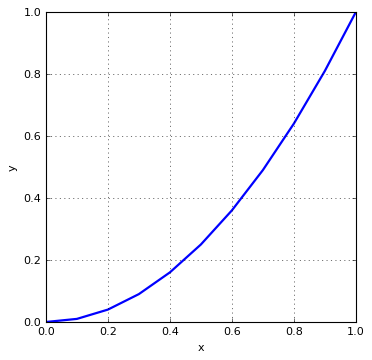

In [5]:
x = np.arange(0,1.1,0.1)
y = my_func1(x)


fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

## For loop implementation

In [6]:
N = 10
x_sample = np.zeros(N)
y_sample = np.zeros(N)

for i in range(N):
    x_rand = np.random.uniform(low=0.0, high=1.0)
    
    x_sample[i] = x_rand
    y_sample[i] = my_func1(x_rand)

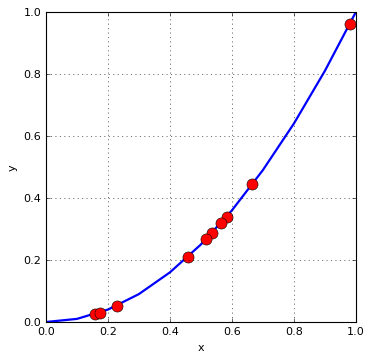

In [7]:
fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x_sample, y_sample, 'ro', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [14]:
est = np.mean(y_sample)
sig = np.sqrt(np.var(y_sample, ddof=1) / N) # Use this instead of np.std(y_sample)/np.sqrt(N)

print("%.3f +- %.3f" % (est,sig))
print("1 sigma interval = [%.3f, %.3f]" % (est-sig, est+sig))

0.293 +- 0.082
1 sigma interval = [0.211, 0.376]


## Vector op implementation

In [49]:
N = 1000
x_sample = np.random.uniform(low=0.0, high=1.0, size=N)
y_sample = my_func1(x_sample)

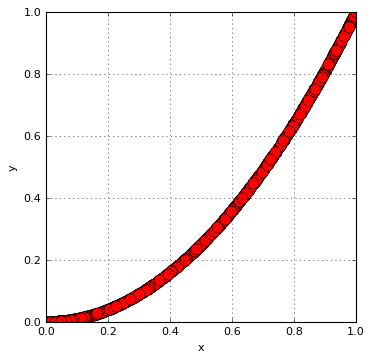

In [50]:
fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x_sample, y_sample, 'ro', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [51]:
est = np.mean(y_sample)
sig = np.std(y_sample)/np.sqrt(N)


print("%.3f +- %.3f" % (est,sig))
print("1 sigma interval = [%.3f, %.3f]" % (est-sig, est+sig))

0.355 +- 0.010
[0.346, 0.365]


## Behaviour with increasing N

In [15]:
N_min = 10
N_max = 1000
N_vec = np.arange(N_min,N_max,10)
N_len = len(N_vec)

num_repeat = 50

est_mean = np.zeros(N_len)
est_var = np.zeros(N_len)
est_mean_temp = np.zeros(num_repeat)
est_var_temp = np.zeros(num_repeat)

for i in range(N_len):
    N = N_vec[i]
    
    for j in range(num_repeat):
        x_sample = np.random.uniform(low=0.0, high=1.0, size=N)
        y_sample = my_func1(x_sample)
        
        est_mean_temp[j] = np.mean(y_sample)
        est_var_temp[j] = np.var(y_sample)*(N/(N-1)) # To correct for the biased sample variance
    
    est_mean[i] = np.mean(est_mean_temp)
    est_var[i] = np.mean(est_var_temp)/N
    
est_std = np.sqrt(est_var)

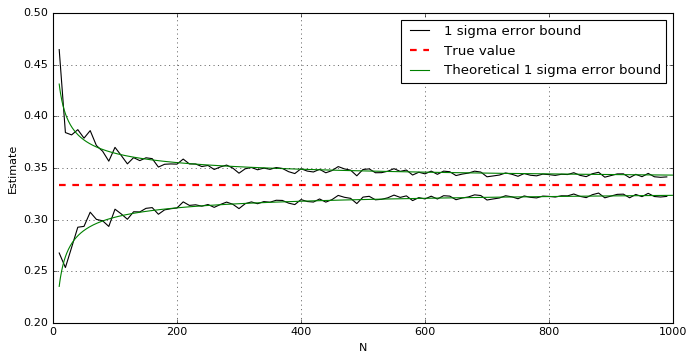

In [26]:
fig = plt.figure(figsize=(10,5))
plt.plot(N_vec, est_mean + 1*est_std, 'k', linewidth=1 , label='1 sigma error bound')
plt.plot(N_vec, est_mean - 1*est_std, 'k', linewidth=1)
plt.plot(N_vec, (1/3)*np.ones(N_len), 'r--', linewidth=2, label='True value')

# Plot also the analytical results.
n = np.arange(10,1000)
y_pos = np.sqrt((1/n) * (23/240)) + 1/3
y_neg = -np.sqrt((1/n) * (23/240)) + 1/3
plt.plot(n, y_pos, 'g', label='Theoretical 1 sigma error bound')
plt.plot(n, y_neg, 'g')

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()
plt.legend(loc='best')

plt.show()

# A more difficult function
Adapted from "Computational Physics" by Mark Newman.

$$
I = \int_0^1 \frac{1}{(e^x+1) \sqrt{x}} \;\; dx
$$

$I$ should be approximately 0.84.

In [27]:
def my_func2(x):
    return 1/((np.exp(x)+1) * np.sqrt(x))

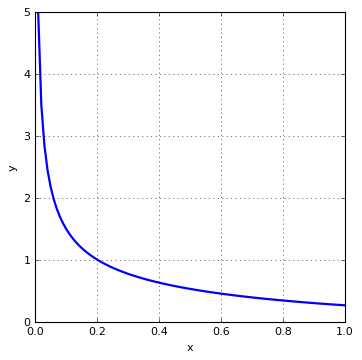

In [28]:
x = np.arange(0.01,1.01,0.01)
y = my_func2(x)

fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [29]:
N = 100
x_sample = np.random.uniform(low=0.0, high=1.0, size=N)
y_sample = my_func2(x_sample)

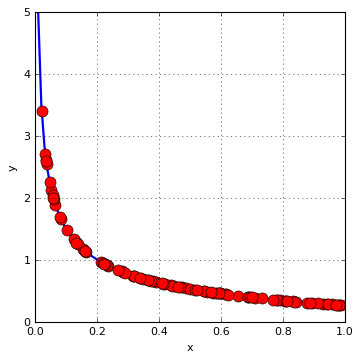

In [30]:
fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x_sample, y_sample, 'ro', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [62]:
est = np.mean(y_sample)
sig = np.std(y_sample)/np.sqrt(N)

print("%.3f +- %.3f" % (est,sig))
print("1 sigma interval = [%.3f, %.3f]" % (est-sig, est+sig))

0.711 +- 0.108
[0.603, 0.819]


## Behaviour with increasing N

In [32]:
N_min = 10
N_max = 1000
N_vec = np.arange(N_min,N_max,10)
N_len = len(N_vec)

num_repeat = 50

est_mean = np.zeros(N_len)
est_var = np.zeros(N_len)
est_mean_temp = np.zeros(num_repeat)
est_var_temp = np.zeros(num_repeat)

for i in range(N_len):
    N = N_vec[i]
    
    for j in range(num_repeat):
        x_sample = np.random.uniform(low=0.0, high=1.0, size=N)
        y_sample = my_func2(x_sample)
        
        est_mean_temp[j] = np.mean(y_sample)
        est_var_temp[j] = np.var(y_sample)*(N/(N-1)) # To correct for the biased sample variance
    
    est_mean[i] = np.mean(est_mean_temp)
    est_var[i] = np.mean(est_var_temp)/N
    
est_std = np.sqrt(est_var)

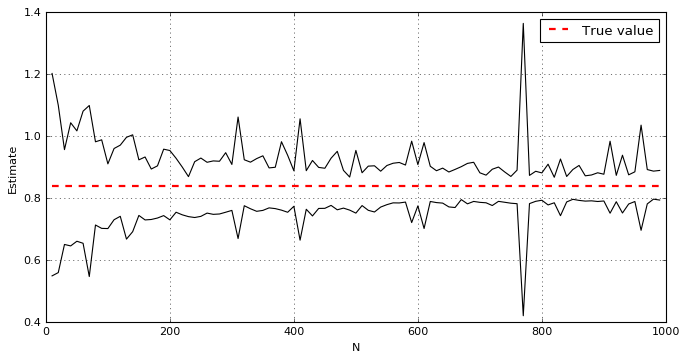

In [33]:
fig = plt.figure(figsize=(10,5))
plt.plot(N_vec, est_mean + 1*est_std, 'k')
plt.plot(N_vec, est_mean - 1*est_std, 'k')
plt.plot(N_vec, (0.84)*np.ones(N_len), 'r--', linewidth=2, label='True value')

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()
plt.legend(loc='best')

plt.show()

In [34]:
# Make a copy of these results for later comparison.
est_mean_withoutImpSamp = (est_mean).copy()
est_std_withoutImpSamp = est_std.copy()

# 3.0 Importance sampling 
If $f(x)$ has divergences in the interval that we would like to integrate over, the following technique called "importance sampling" can help us get around this. 
Write
$$
I = \int_a^b f(x) dx
$$
as 
$$
I = \int_a^b g(x)w(x) dx.
$$

Now normalise $w(x)$ such that it becomes a probability density function $p(x)$ on [a,b] by

\begin{align}
I &= k \int_a^b g(x)\frac{w(x)}{k} dx 
\end{align}
where
$$
k = \int_a^b w(x) dx.
$$

This is then equivalent to finding the weighted average of $g(x)$ with the weighting function $p(x) = w(x)/k$, in other words,
$$
I = k \int_a^b g(x)p(x) dx
$$

which can be approximated as

$$
I \approx k \sum_{i=1}^N g(x_i)
$$

where the samples $x_i$ are drawn according to the probability density function $p(x)$. Note that $w(x)=1$ yields the mean-value method discussed in the previous section.

In our case

$$
f(x) = \frac{1}{(e^x+1) \sqrt{x}}
$$

and so 
$$
g(x) = \frac{1}{e^x+1}
$$

$$
w(x) = \frac{1}{\sqrt{x}}
$$

and we draw samples of $x$ distributed as:
$$
p(x) = \frac{1}{2\sqrt{x}}
$$





# 4.1 Generating random numbers from a specified PDF
Adpated from http://people.duke.edu/~ccc14/sta-663-2017/15A_Random_Numbers.html

In [62]:
def my_pdf(x):
    """PDF"""
    return 1/(2*np.sqrt(x))

def my_cdf(x):
    """CDF"""
    return np.sqrt(x)

def my_icdf(x):
    """Inverse CDF"""
    return x**2

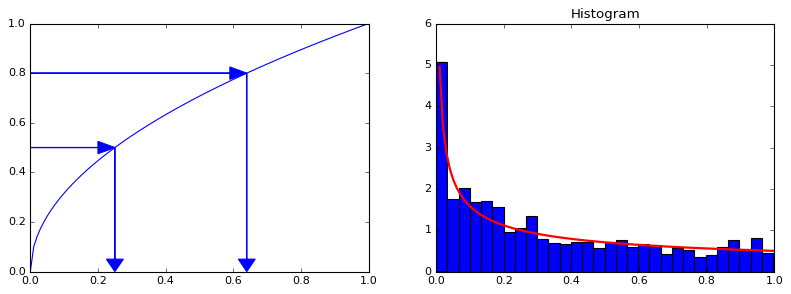

In [36]:
x = np.linspace(0,1,100)
u = np.random.random(1000)
v = my_icdf(u)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.axis([0, 1, 0, 1])

plt.plot(x, my_cdf(x), linewidth=1)

# Here is drawing arrows on plots.
arrow_l = 0.05
arrow_w = 0.05
for q in [0.5, 0.8]:
    plt.arrow(0, q, my_icdf(q)-arrow_l, 0,
              head_width=arrow_w, head_length=arrow_l, fc='b', ec='b')
    plt.arrow(my_icdf(q), q, 0, -q+arrow_w, 
              head_width=arrow_w, head_length=arrow_l, fc='b', ec='b')

plt.subplot(122)
plt.hist(v, bins=30, normed=True, linewidth=1)
plt.plot(x[1:], my_pdf(x[1:]), 'r-', linewidth=2)
plt.xlim(0,1)
plt.title('Histogram')

plt.show()

# 4.2 Now do importance sampling

In [37]:
# This is our new function that we have to sample

def my_func3(x):
    return 1/(np.exp(x)+1)

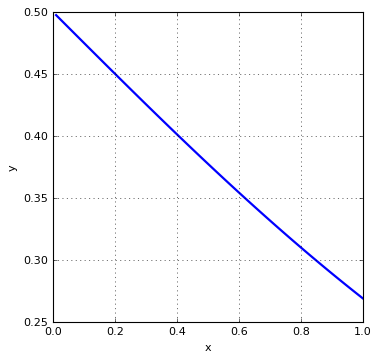

In [38]:
x = np.arange(0.01,1.01,0.01)
y = my_func3(x)

fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [52]:
N = 100

# x_sample = np.random.uniform(low=0.0, high=1.0, size=N)
# y_sample = my_func3(x_sample)

# We sample this new function like so:
u = np.random.uniform(low=0.0, high=1.0, size=N)
x_sample = my_icdf(u)
y_sample = my_func3(x_sample)

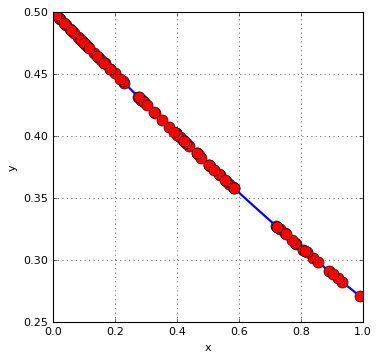

In [53]:
fig = plt.figure(figsize=(5,5))

plt.plot(x, y, 'b-', linewidth=2)
plt.plot(x_sample, y_sample, 'ro', markersize=10)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

In [58]:
norm_const = 2 # This is the value of the integral of the weighting function w(x) in the desired interval [0,1].

est = np.mean(y_sample) * norm_const
sig = np.std(y_sample)/np.sqrt(N) * norm_const

print("%.3f +- %.3f" % (est,sig))
print("1 sigma interval = [%.3f, %.3f]" % (est-sig, est+sig))

0.818 +- 0.047
1 sigma interval = [0.771, 0.865]


## Behaviour with increasing N

In [59]:
N_min = 10
N_max = 1000
N_vec = np.arange(N_min,N_max,10)
N_len = len(N_vec)

num_repeat = 50

est_mean = np.zeros(N_len)
est_var = np.zeros(N_len)
est_mean_temp = np.zeros(num_repeat)
est_var_temp = np.zeros(num_repeat)

for i in range(N_len):
    N = N_vec[i]
    
    for j in range(num_repeat):
        u = np.random.uniform(low=0.0, high=1.0, size=N)
        x_sample = my_icdf(u)
        y_sample = my_func3(x_sample)
        
        est_mean_temp[j] = np.mean(y_sample) * norm_const
        est_var_temp[j] = np.var(y_sample)*(N/(N-1)) * norm_const # To correct for the biased sample variance
    
    est_mean[i] = np.mean(est_mean_temp)
    est_var[i] = np.mean(est_var_temp)/N
    
est_std = np.sqrt(est_var)

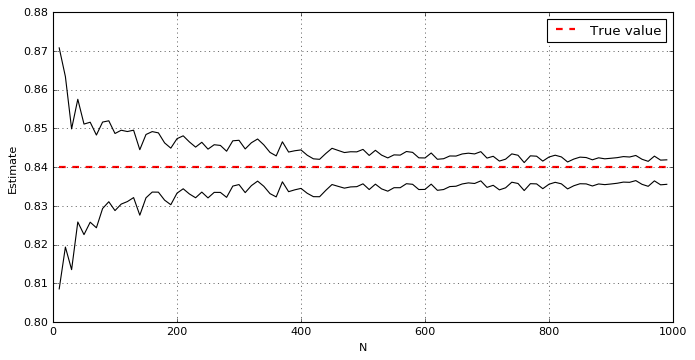

In [60]:
fig = plt.figure(figsize=(10,5))
plt.plot(N_vec, est_mean + 1*est_std, 'k')
plt.plot(N_vec, est_mean - 1*est_std, 'k')
plt.plot(N_vec, (0.84)*np.ones(N_len), 'r--', linewidth=2, label='True value')

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()
plt.legend(loc='best')

plt.show()

# 4.3 Compare to previous result obtained without importance sampling 

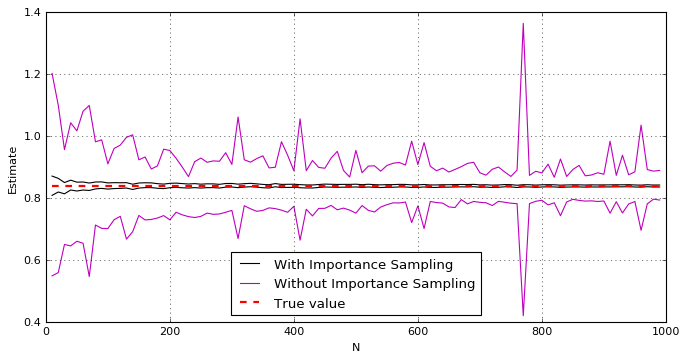

In [61]:
fig = plt.figure(figsize=(10,5))
plt.plot(N_vec, est_mean + 1*est_std, 'k', label='With Importance Sampling')
plt.plot(N_vec, est_mean - 1*est_std, 'k')
plt.plot(N_vec, est_mean_withoutImpSamp + 1*est_std_withoutImpSamp, 'm', label='Without Importance Sampling')
plt.plot(N_vec, est_mean_withoutImpSamp - 1*est_std_withoutImpSamp, 'm')

plt.plot(N_vec, (0.84)*np.ones(N_len), 'r--', linewidth=2, label='True value')

plt.xlabel('N')
plt.ylabel('Estimate')
plt.grid()
plt.legend(loc='best')

plt.show()